## Assignment 5. Exploring Simple Linear Regression 

In this assignment you will be exploring the following.
1. A few simple Pandas cleaning topics for review.
2. Regression Analysis. 
    * You will perform two examples of simple linear regression where you will run regressions and interpret results. In this context, you will examine both standardized and non-standardized data to compare how the results will differ in meaning. 
    * You will provide graphical representations of your regression for each regression.
    
NOTE: Please recall that you need to import all appropriate packages at the beginning of your effort.

What are the key learning goals of this assignment?
1. Students will understand basic methods of handling missing data.
2. Students will understand one method of standardizing data as part of the data preparation process.
3. Students will understand how to formulate hypotheses in anticipation of regression analysis. In this regard, students will be able to explain their choices of dependent and independent variables in regression analysis.
4. Students will be able to interpret regression coefficients and perform hypothesis tests.
5. Students will be able to interpret correctly one measure of goodness of fit - $R^2$.

Problem 1. Pandas examples
1. Please read in World_bank.csv as a Pandas data frame.
2. Set a country and year as a multindex.
3. Convert the symbols for missing observations to NaN's. 
3. Count the frequency of missing observations in each column.
4. Use the `.interpolate()` method to interpolate the missing observations.
5. Examine the interpolated results and please 

In [104]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd  
from scipy import stats

In [105]:
filename = "World_bank.csv"
WBData = pd.read_csv(filename)
WBData.head()

,Country,Year,Maternal_mortality,Life_expectancy
0,Guatemala,2010,87,70.878
1,Guatemala,2011,76,71.177
2,Guatemala,2012,85,71.463
3,Guatemala,2013,..,71.728
4,Guatemala,2014,68,71.964


In [106]:
WBData.set_index(['Country', 'Year'], inplace=True)

In [107]:
WBData.replace("..", np.nan, inplace = True)

In [108]:
missing_data = WBData.isnull()
WBData

Maternal_mortality  Life_expectancy
Country     Year                                    
Guatemala   2010                 87           70.878
            2011                 76           71.177
            2012                 85           71.463
            2013                NaN           71.728
            2014                 68           71.964
            2015                 71           72.103
            2016                 71           72.355
            2017                112           72.551
            2018                107           72.726
            2019                NaN           73.129
            2020                NaN           71.797
El Salvador 2010                 14           71.848
            2011                 13           71.859
            2012                 14           71.831
            2013                NaN           71.771
            2014                NaN           71.746
            2015                NaN           71.814
            2016                NaN           72.025
            2017                NaN           72.311
            2018                NaN           72.555
            2019                NaN           72.559
            2020                NaN           71.061
Honduras    2010                NaN           71.088
            2011                 76           71.439
            2012                NaN           71.734
            2013                 62           71.963
            2014                 71           72.259
            2015                NaN           72.487
            2016                NaN           72.588
            2017                NaN           72.692
            2018                NaN           72.814
            2019                NaN           72.881
            2020                NaN           71.462
Mexico      2010                 43           74.190
            2011                 42           74.365
            2012                 41           74.574
            2013                 37           74.739
            2014                 38           74.797
            2015                 34           74.682
            2016                 36           74.412
            2017                NaN           74.138
            2018                NaN           74.015
            2019                NaN           74.202
            2020                NaN           70.133

In [109]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")
print("There are 23 missing observations for Maternal_mortality")

Maternal_mortality
Maternal_mortality
True     23
False    21
Name: count, dtype: int64

Life_expectancy
Life_expectancy
False    44
Name: count, dtype: int64

There are 23 missing observations for Maternal_mortality


In [110]:
WBData['Maternal_mortality'] = WBData['Maternal_mortality'].astype(float)
WBData['Maternal_mortality'].interpolate(method='linear', axis = 0,  inplace=True, limit_direction='both')
WBData

Maternal_mortality  Life_expectancy
Country     Year                                     
Guatemala   2010                87.0           70.878
            2011                76.0           71.177
            2012                85.0           71.463
            2013                76.5           71.728
            2014                68.0           71.964
            2015                71.0           72.103
            2016                71.0           72.355
            2017               112.0           72.551
            2018               107.0           72.726
            2019                76.0           73.129
            2020                45.0           71.797
El Salvador 2010                14.0           71.848
            2011                13.0           71.859
            2012                14.0           71.831
            2013                20.2           71.771
            2014                26.4           71.746
            2015                32.6           71.814
            2016                38.8           72.025
            2017                45.0           72.311
            2018                51.2           72.555
            2019                57.4           72.559
            2020                63.6           71.061
Honduras    2010                69.8           71.088
            2011                76.0           71.439
            2012                69.0           71.734
            2013                62.0           71.963
            2014                71.0           72.259
            2015                67.0           72.487
            2016                63.0           72.588
            2017                59.0           72.692
            2018                55.0           72.814
            2019                51.0           72.881
            2020                47.0           71.462
Mexico      2010                43.0           74.190
            2011                42.0           74.365
            2012                41.0           74.574
            2013                37.0           74.739
            2014                38.0           74.797
            2015                34.0           74.682
            2016                36.0           74.412
            2017                36.0           74.138
            2018                36.0           74.015
            2019                36.0           74.202
            2020                36.0           70.133

Problem 2. Simple Regression 1
Referring back to the American Time Use Data, perform the following actions.
1. Read that data in as a Pandas dataframe.
2. Chose and explain your choice of a dependent and independent variable for the performance of a regression. Please formulate a hypothesis about their relationship.
3. Create a smaller dataframe that includes only those two variables. Call this ATUS_small_df.
4. Using Pandas methods, provide summary statistics and correlations for this smaller data frame. Interpret observations.
5. Create two new variables that represent standardized versions of the two variables in the ATUS_small_df have them as additional columns to the ATUS_small_df.
6. Using the SCIPY regression method, please perform the simple regression using the non-standardized variables and report your results.
    * Interpret the meaning of the constant and slope coefficients.
    * Provide a hypothesis test for the slope coefficient.
    * Interpret your goodness of fit.
    * Provide a graphical representation of your regression line as shown in Unit 8. You can use the Matplotlib and Seaborn approaches.
7. Please repeat step 6 for the standardized version of the variables and report your results.  

In [111]:
#Read Data
ATUS_df = pd.read_csv("ATUS Data.csv")

In my regression equation, I choose minutes spent on personal care as my dependent variable, and hours worked per week as my independent variable.

$H_0$ : An increase in hours worked per week is not associated with a decrease in minutes spent on personal care.

$H_a$ : An increase in hours worked per week is associated with a decrease in minutes spent on personal care.

In [112]:
ATUS_small_df=ATUS_df[['personal care','hours usually worked per week']].copy()

In [113]:
ATUS_small_df.describe().apply(lambda x: x.apply('{0:.3f}'.format))

,personal care,hours usually worked per week
count,4263.000,4263.000
mean,577.518,38.501
std,134.851,13.970
min,0.000,0.000
25%,495.000,38.000
50%,570.000,40.000
75%,643.500,45.000
max,1440.000,119.000


### Interpretation of Summary Statistics

The table shows that both personal care and hours usually worked per week has 4,263 observations. On average, people spend 577.52 minutes on personal care with a standard deviation of 134.85, showing high variability. Furthermore, the average of hours usually worked per week is 38.50 hours, with a standard deviation of 13.97. The data reveals that the minimum time spent on personal care is 0 minutes, while the maximum time is 1,440 minutes. It also shows us that the range for hours usually worked per week is from 0 to 119 hours. The percentiles show the distribution, with 25% of individuals spending below 495 minutes on personal care and 25% working fewer than 38 hours per week. The 50th percentile of people spend 570 minutes on personal care and work 40 hours per week usually. Additionally, the 75th percentile indicates that 75% of individuals spend below 643.5 minutes on personal care and work fewer than 45 hours per week. Individuals behave very differently regarding their personal care and work hours.









In [114]:
ATUS_small_df.corr()

,personal care,hours usually worked per week
personal care,1.00000,-0.12129
hours usually worked per week,-0.12129,1.00000


Correlation between hours usually worked per week and minutes spent on personal acre of -0.12 shows a weak linear negative relationship between the two variables.

In [115]:
standardization = lambda x: (x - x.mean()) / (2 * x.std())
ATUS_small_df[['personalcare_sd', 'hours usually worked per week_sd']] = ATUS_small_df[['personal care','hours usually worked per week']].apply(standardization)

In [116]:
result = stats.linregress(ATUS_small_df['hours usually worked per week'], ATUS_small_df['personal care'])
print("""The regression equation implies that {} = {:.2f} + {:.2f}*{} and the \nR-squared value of the regression is {:.2f} \
with the p-value on the slope coefficient being {:.2f}""".format("PersonalCare", result.intercept, result.slope,"HrsUsuallyWorkedPerWeek", result.rvalue**2, result.pvalue))

The regression equation implies that PersonalCare = 622.60 + -1.17*HrsUsuallyWorkedPerWeek and the 
R-squared value of the regression is 0.01 with the p-value on the slope coefficient being 0.00


##### Interpretation:
_Constant Coefficient:_ 622.60

The constant term tells us that the estimated value of personal care when hours usually worked per week is zero. Therefore, a constant coefficient of 622.60 means that the time spent on personal care when someone does not work any hours per week is 622.60 minutes.

_Slope Coefficient:_ -1.17

The slope coefficient tells us the change in the estimated amount of time spent on personal care for a one-unit change in hours usually worked per week. So, a slope of -1.17 means that for each additional hour worked per week, the estimated time spent on personal care decreases by 1.17 units/minutes.

$H_0$ : $\beta_1 = 0$ There is no relationship between personal care and hours worked per week. The slope coefficient is equal to zero.

$H_a$ :  $\beta_1 \neq 0$ There is a significant relationship between personal care and hours worked per week. The slope coefficient is not equal to zero.

The P-value on the slope coefficient is equal to 0.00, meaning we can reject the null hypothesis at the 95% sig level.
The R value of 0.01 shows an extremely weak relationship. Only 1% of the variability in personal care is explained by the linear relationship with hours usually worked per week, showing a weak fit model of the data.


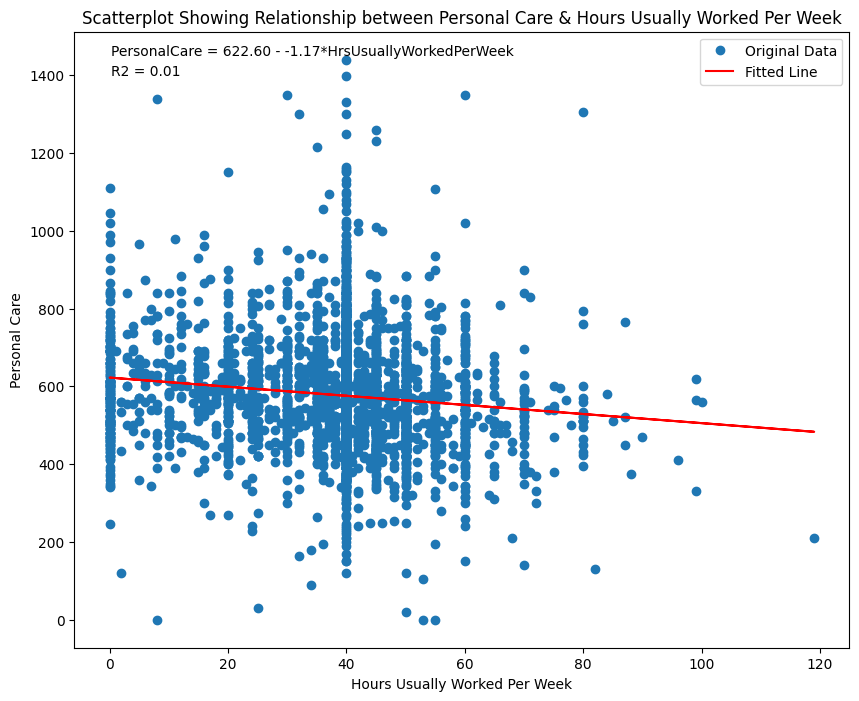

In [117]:
ATUS_est = result.intercept + result.slope*ATUS_small_df['hours usually worked per week']
plt.plot(ATUS_small_df['hours usually worked per week'], ATUS_small_df['personal care'], "o", label = "Original Data")
plt.plot(ATUS_small_df['hours usually worked per week'], ATUS_est, "r", label = "Fitted Line")
plt.text(0.25, 1400, "R2 = {:.2f}".format(result.rvalue**2), horizontalalignment='left', size='medium', color='black')
plt.text(0.25, 1450, "PersonalCare = {:.2f} - {:.2f}*HrsUsuallyWorkedPerWeek".format(result.intercept, result.slope), horizontalalignment='left', size='medium', color='black')
plt.legend()
plt.title("Scatterplot Showing Relationship between Personal Care & Hours Usually Worked Per Week")
plt.gcf().set_size_inches(10, 8)
plt.xlabel("Hours Usually Worked Per Week")
plt.ylabel("Personal Care")
plt.show()

In [118]:
#Standardized Variables
result = stats.linregress(ATUS_small_df['hours usually worked per week_sd'], ATUS_small_df['personalcare_sd'])
print("""The regression equation implies that {} = {:.2f} + {:.2f}*{} and the \nR-squared value of the regression is {:.2f} \
with the p-value on the slope coefficient being {:.2f}""".format("PersonalCare", result.intercept, result.slope,"HrsUsuallyWorkedPerWeek", result.rvalue**2, result.pvalue))

The regression equation implies that PersonalCare = -0.00 + -0.12*HrsUsuallyWorkedPerWeek and the 
R-squared value of the regression is 0.01 with the p-value on the slope coefficient being 0.00


##### Interpretation:
_Constant Coefficient:_ 0

The constant term tells us that the estimated value of personal care when hours usually worked per week is zero. Therefore, a constant coefficient of 0 means that the time spent on personal care when someone does not work any hours per week is 0 minutes.

_Slope Coefficient:_ -0.12

The slope coefficient tells us the change in the estimated amount of time spent on personal care for a one-unit change in hours usually worked per week. So, a slope of -0.12 means that for each additional hour worked per week, the estimated time spent on personal care decreases by 0.12 units/minutes.

$H_0$ : $\beta_1 = 0$ There is no relationship between personal care and hours worked per week. The slope coefficient is equal to zero.

$H_a$ :  $\beta_1 \neq 0$ There is a significant relationship between personal care and hours worked per week. The slope coefficient is not equal to zero.

Again, the P-value on the slope coefficient is equal to 0.00, meaning we can reject the null hypothesis at the 95% sig level.
The R value of 0.01 shows an extremely weak relationship. Only 1% of the variability in personal care is explained by the linear relationship with hours usually worked per week, showing a weak fit model of the data.


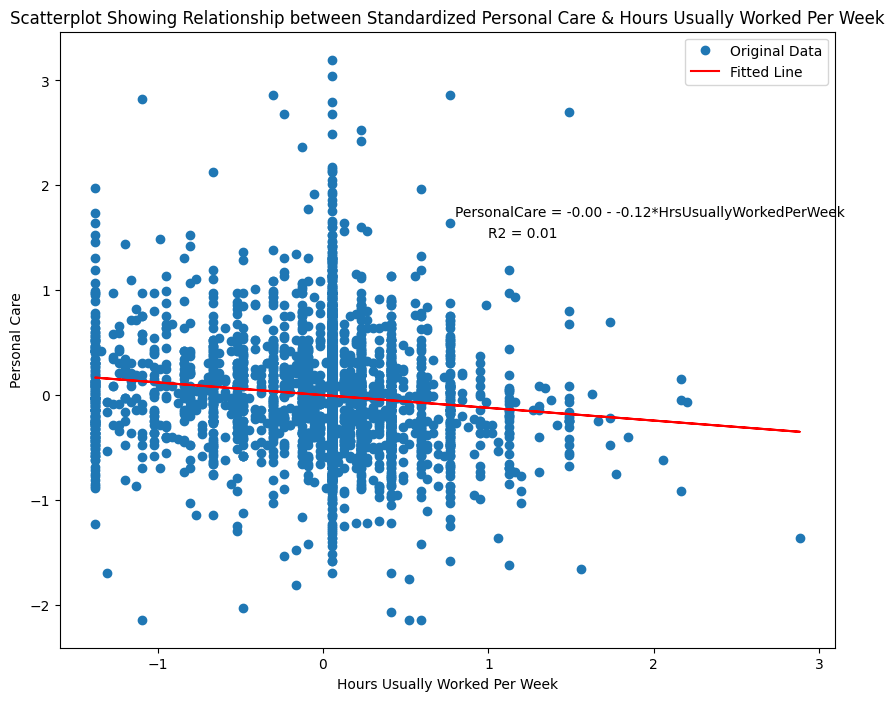

In [119]:
ATUS_est = result.intercept + result.slope*ATUS_small_df['hours usually worked per week_sd']
plt.plot(ATUS_small_df['hours usually worked per week_sd'], ATUS_small_df['personalcare_sd'], "o", label = "Original Data")
plt.plot(ATUS_small_df['hours usually worked per week_sd'], ATUS_est, "r", label = "Fitted Line")
plt.text(1, 1.5, "R2 = {:.2f}".format(result.rvalue**2), horizontalalignment='left', size='medium', color='black')
plt.text(0.8, 1.7, "PersonalCare = {:.2f} - {:.2f}*HrsUsuallyWorkedPerWeek".format(result.intercept, result.slope), horizontalalignment='left', size='medium', color='black')
plt.legend()
plt.title("Scatterplot Showing Relationship between Standardized Personal Care & Hours Usually Worked Per Week")
plt.gcf().set_size_inches(10, 8)
plt.xlabel("Hours Usually Worked Per Week")
plt.ylabel("Personal Care")
plt.show()

Problem 3. Simple Regression 2 - Freestyle
1. Choose one of the following csv files: Home_prices.csv, baseball.csv, StateData.csv, wnba-player-stats.csv. If you really want to choose some other data set that is not included here that you find from your own research you can, but you should be sure that the data has at least 50 observations.
2. Read that file in as a Pandas data frame.
3. Perform steps 2 through 6 as explained in Problem 2. 

NOTE: An important piece of this assignment would be a demonstration of your ability to choose variables that should be causally related. For example, choosing values that are correlated simply because they are each a function of some other variable would not be interesting. So, if you choose the sports variables, you should be cautious. In addition, you are welcome to perform aggregations in the more complicated data sets to create a new dataframe of aggregated variables that you might want to relate. 


In [120]:
# State Data
#Read Data
State_df = pd.read_csv("StateData.csv")

In my regression equation, I chose poverty rate as the dependent variable and internet access as the independent variable.

$H_0$ : An increase in internet access is not associated with a decrease in poverty rate.

$H_a$ : An increase in internet access is negatively associated with a decrease in poverty rate.

In [121]:
State_small_df=State_df[['Internet access','Poverty rate']].copy()

In [122]:
State_small_df.describe().apply(lambda x: x.apply('{0:.3f}'.format))

,Internet access,Poverty rate
count,51.000,51.000
mean,86.076,12.171
std,3.116,2.678
min,77.000,7.300
25%,84.400,10.100
50%,86.200,11.800
75%,88.250,13.500
max,91.400,19.600


### Interpretation of Summary Statistics

There are 51 states of internet access and poverty rate. On average, the rate of internet access is 86.076, showing that theres a high level of internet access amongst US states. The standard deviation of 3.116 demonstrates slight variability in internet access rates amongst the states, indicating difference in access rates. The range from 77 to 91.4 also shows the variability in internet access rates. In terms of poverty rates, the average is approximately 12.171, showing a poverty rate below 10% for most US states. The standard deviation of 2.678 also shows some variability in poverty rates, showing that states may suffer differently. The minimum and maximum of 7.3 to 19.6 also highlights this broad range of poverty rates. Overall, these could indicate that there is large discrepancies between the 50 states in poverty rates and internet access rates.


In [123]:
State_small_df.corr()

,Internet access,Poverty rate
Internet access,1.00000,-0.84596
Poverty rate,-0.84596,1.00000


Correlation between internet access and poverty rate of -0.84 shows a strong linear negative relationship between the two variables.

In [124]:
standardization = lambda x: (x - x.mean()) / (2 * x.std())
State_small_df[['Internet access_sd','Poverty rate_sd']] = State_small_df[['Internet access','Poverty rate']].apply(standardization)

In [125]:
result = stats.linregress(State_small_df['Internet access'], State_small_df['Poverty rate'])
print("""The regression equation implies that {} = {:.2f} + {:.2f}*{} and the \nR-squared value of the regression is {:.2f} \
with the p-value on the slope coefficient being {:.2f}""".format("PovertyRate", result.intercept, result.slope,"InternetAccess", result.rvalue**2, result.pvalue))

The regression equation implies that PovertyRate = 74.75 + -0.73*InternetAccess and the 
R-squared value of the regression is 0.72 with the p-value on the slope coefficient being 0.00


##### Interpretation:
_Constant Coefficient:_ 74.75

The constant term tells us that the estimated value of the poverty rate care when internet access is zero. Therefore, a constant coefficient of 74.75 means that the poverty rate when there is no internet access is 74.75.
_Slope Coefficient:_ -0.73

The slope coefficient tells us the change in the estimated poverty rate for a one-unit change in internet access. So, a slope of -0.73 means that for each additional percent of internet access or 1 unit-change in internet access, the estimated poverty rate decreases by 0.73 units.

$H_0$ : $\beta_1 = 0$ There is no relationship between internet access and poverty rate. The slope coefficient is equal to zero.

$H_a$ :  $\beta_1 \neq 0$ There is a significant relationship between internet access and poverty rate. The slope coefficient is not equal to zero.

Again, the P-value on the slope coefficient is equal to 0.00, meaning we can reject the null hypothesis at the 95% sig level.
The R value of 0.72 shows a strong relationship, it is quite close to 1. This means 72% of the variability in the dependent variable is explained by the linear relationship with the independent variable(s), indicating a strong fit of the model to the data.

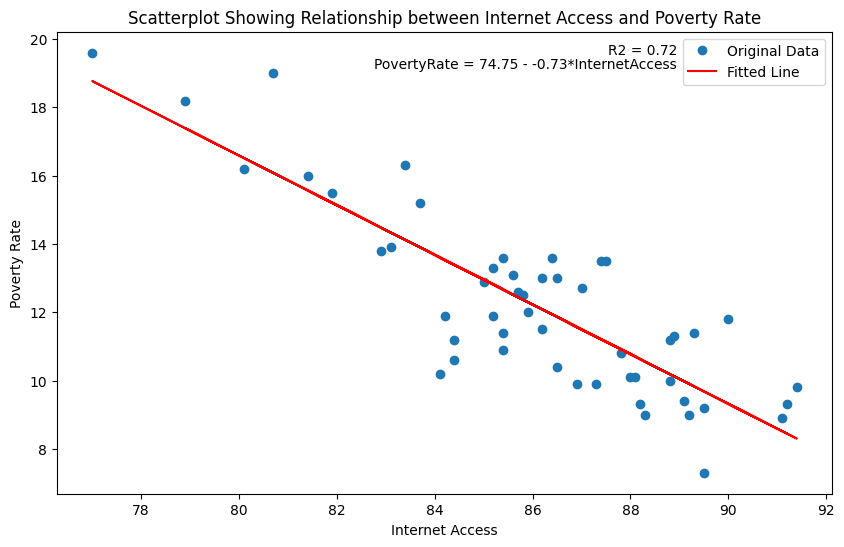

In [126]:
State_est = result.intercept + result.slope*State_small_df['Internet access']
plt.plot(State_small_df['Internet access'], State_small_df['Poverty rate'], "o", label = "Original Data")
plt.plot(State_small_df['Internet access'], State_est, "r", label = "Fitted Line")
plt.text(0.8, 0.95, "R2 = {:.2f}".format(result.rvalue**2), horizontalalignment='right', size='medium', color='black',transform=plt.gca().transAxes)
plt.text(0.8, 0.92, "PovertyRate = {:.2f} - {:.2f}*InternetAccess".format(result.intercept, result.slope), horizontalalignment='right', size='medium', color='black',transform=plt.gca().transAxes)
plt.legend()
plt.title("Scatterplot Showing Relationship between Internet Access and Poverty Rate")
plt.gcf().set_size_inches(10, 6)
plt.xlabel("Internet Access")
plt.ylabel("Poverty Rate")
plt.show()